##  Bank Marketing

**Abstract:**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read in the data set using the code:
```
#reading the dataset
import pandas as pd
import requests
from io import StringIO  

orig_url="-----" # copy and paste a Goodle drive share link to the data
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated
```

In [2]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1IZQz-1sZtD7R2VVe_JuhWRf5vAMa-B2E/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated

### Examine the first few lines of the data set using the method

```data_frame.head()```

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Examine the data information using the method
```data_frame.info()```

In [4]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Check for missing values using the method
```data_frame.isnull().any()```

In [5]:
bank.isnull().any() # one way to search for null values

,0
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
contact,False
day,False


### Separate the numerical and categorical variables
They will be treated differently in preprocessing and in visualization

In [6]:
# separate the numerical columns
# 'age', 'duration','campaign','pdays', 'previous'

num_cols=['age', 'duration','campaign','pdays', 'previous']

In [7]:
# separate the categorical columns
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'

cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

### Examine the first few rows of the numerical data

In [8]:
bank[num_cols]

,age,duration,campaign,pdays,previous
0,58,261,1,-1,0
1,44,151,1,-1,0
2,33,76,1,-1,0
3,47,92,1,-1,0
4,33,198,1,-1,0
...,...,...,...,...,...
45206,51,977,3,-1,0
45207,71,456,2,-1,0
45208,72,1127,5,184,3
45209,57,508,4,-1,0


### Run a statistical summary of the numerical data

In [9]:
bank[num_cols].describe()

,age,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,258.163080,2.763841,40.197828,0.580323
std,10.618762,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,4918.000000,63.000000,871.000000,275.000000


### Examine the first few rows of the categorical data


In [10]:
bank[cat_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Creating dummy variables for the categorical variables.

Before doing so, check for the unique values in the column using the ```unique()``` method. The variables with only two values will be handled differently (note that this separation is not a requirement, merely conventional).

```data_frame['column'].unique()```

In [11]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

### Get dummies for ```'job', 'marital', 'education', 'contact', 'month', 'poutcome'```
Use the ```get_dummies()``` method for the variables with more than two categories. Reassign the bank data frame so that it has the newly transformed variables.
```
data_frame=pd.get_dummies(data=data_frame, columns=categorical_columns, drop_first=True)
```

In [14]:
#creating list of dummy columns
cat_cols_dummies=['job', 'marital', 'education', 'contact', 'month', 'poutcome']

#creating dummy variables and reassigning the data frame
bank = pd.get_dummies(data = bank, columns= cat_cols_dummies, drop_first= True)


### Convert ```yes', 'no'``` to ```0, 1```
For categorical variables with 'yes' or 'no' values, convert the 'yes' to 1 and the 'no' values to 0.

In [15]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
dict_default={'yes': 1, 'no':0}
dict_housing={'yes': 1, 'no':0}
dict_loan={'yes': 1, 'no':0}
dict_y={'yes': 1, 'no':0}

bank['default']=bank.default.map(dict_default)
bank['housing']=bank.housing.map(dict_housing)
bank['loan']=bank.loan.map(dict_loan)
bank['y']=bank.y.map(dict_y)


### Examine the first few lines of the bank data *set*

In [ ]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


Check again for missing values and data types.

In [20]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

Notice that all variables have 45,211 non-null values and that all of the data types are numerical. (watch out for `object` data types)

### Separate the feature variables from the target variable.

In [21]:
#Separating target variable and other variables
y= bank['y']
X= bank.drop(columns = ['y'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

### Run the standard scalar to transform the values in the collection of feature values.
```
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here

X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
```

In [22]:
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

### Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [23]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting an customer will subscribe and the don't
2. Predicting a customer will not subscribe and they do.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [24]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Subscribe', 'Subscribe'], yticklabels=['Not Subscribe', 'Subscribe'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression Model

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [25]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

### Checking model performance

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.66      0.36      0.46      3702

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



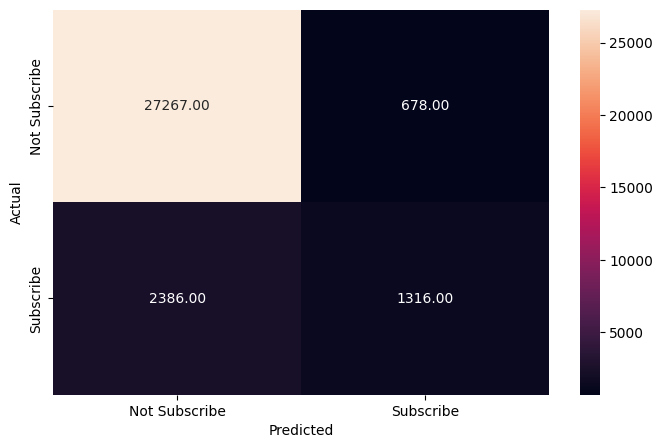

In [26]:
#checking the performance on the training data
y_pred_train_lg = lg.predict(X_train)
metrics_score(y_train, y_pred_train_lg)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.64      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



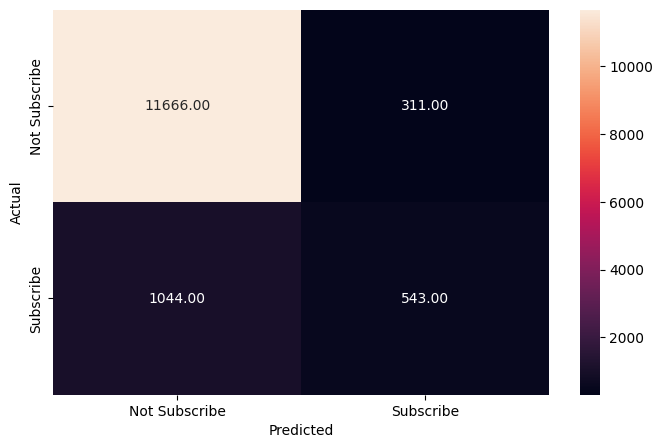

In [27]:
#checking the performance on the test dataset
y_pred_test_lg = lg.predict(X_test)
metrics_score(y_test, y_pred_test_lg)

### Problem 1: Generalization Performance for Logistic Regression
**Compare the training and testing results.**

- **How well does the model perform?**
    - For Class 1 (the "Subscribe" class), the model struggles more, with lower recall (only 36% on training and 34% on testing), meaning it is not identifying a large portion of actual "Subscribe" customers.
Precision for Class 1 is around 0.64–0.66, meaning when the model predicts a customer will subscribe, it’s correct about 64-66% of the time.

- **Compare the performance on the training and testing data.**
  Training Data:

Accuracy: 90%
Testing Data:

Accuracy: 90% (same as training data).

- **Based on your analysis of the training and testing performance, state whether or not overfitting is a concern and explain how you know.**
    - The model shows very similar performance on both the training and testing datasets, so overfitting is not a concern.


- **Interpret the precision and recall values for class 1 in the context of the business scenario.**     
    - When the model predicts that a customer will subscribe, it's correct 66% of the time. This is reasonably good, meaning the model is relatively accurate in predicting subscribers.The recall is lower, which means that the model is only correctly identifying 36% of the actual subscribers.

### Tree Induction Model



In [28]:
#fitting logistic regression model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27945
           1       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



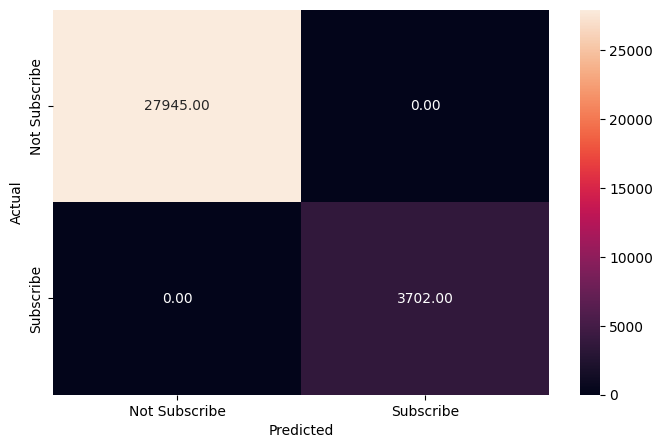

In [29]:
y_pred_train_dt = dt.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.46      0.47      0.46      1587

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



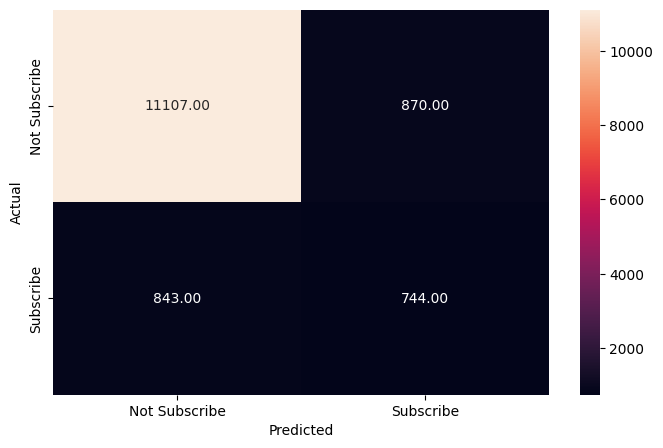

In [30]:
y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

### Problem 2: Generalization Performance for Tree Induction
**Compare the training and testing results.**

- **How well does the model perform?**
    - The training data (first confusion matrix) shows a perfect result, with an accuracy of 100% and precision, recall, and F1 scores of 1.0 for both classes. This suggests that the model fits the training data perfectly.
    The testing data (second confusion matrix) shows a more realistic performance.

- **Compare the performance on the training and testing data.**
    - In the training data, the model performs too perfectly, which is a sign of potential overfitting.
In the testing data, the model's performance drops, particularly for Class 1 (the "Subscribe" class), where both precision and recall are around 0.46–0.47. This drop is significant when compared to the perfect training results, further suggesting overfitting.

- **Based on your analysis of the training and testing performance, state whether or not overfitting is a concern and explain how you know.**
    - Yes, overfitting is a concern. The model fits the training data perfectly but does not generalize well to unseen data (testing set).

- **Interpret the precision and recall values for class 1 in the context of the business scenario.**     
    - When the model predicts that a customer will subscribe, it's correct 46% of the time. This indicates a moderately low precision, which could result in unnecessary efforts to reach out to customers who may not actually subscribe.
 The recall indicates that the model only identifies 47% of the actual subscribers. This means that more than half of the customers who would subscribe are not being identified by the model, which could result in missed opportunities.

### Tree Model Performance for Varrying Numbers of Nodes

In [31]:
# List of max leaf nodes to try
max_nodes = [2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000]
accuracies = []

# Loop over each value of max_leaf_nodes
for nodes in max_nodes:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracies.append((accuracy_train, accuracy_test))

accuracy_scores=pd.DataFrame(accuracies, columns=["Training Accuracy", "Testing Accuracy"])
accuracy_scores

,Training Accuracy,Testing Accuracy
0,0.883022,0.882999
1,0.889626,0.888823
2,0.895914,0.894574
3,0.895914,0.894574
4,0.901286,0.899882
5,0.904478,0.901209
6,0.908238,0.903273
7,0.915221,0.902905
8,0.923658,0.899292
9,0.943849,0.895090


### Fitting Curve for Tree Model

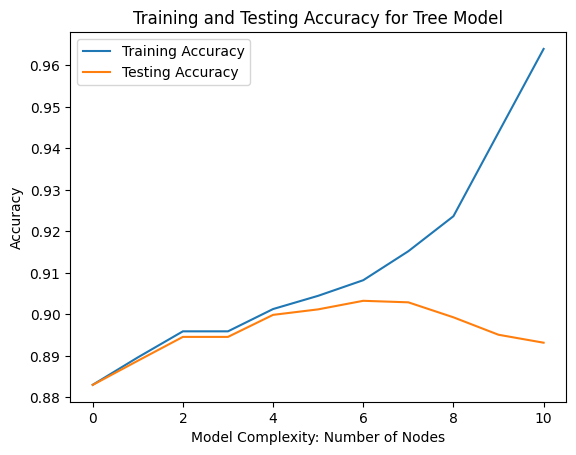

In [32]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot both columns on the same axis
ax.plot(accuracy_scores["Training Accuracy"], label="Training Accuracy")
ax.plot(accuracy_scores["Testing Accuracy"], label="Testing Accuracy")

# Add a legend to differentiate the lines
ax.legend()

# Add labels to the axes
ax.set_xlabel("Model Complexity: Number of Nodes")
ax.set_ylabel("Accuracy")

# Add a title to the plot
ax.set_title("Training and Testing Accuracy for Tree Model")

# Display the plot
plt.show()


### Problem 3: Achieving Optimal Performance in Tree Model
**Compare the training and testing results for the tree model.**

- **Based on the fitting graph, how many tree nodes should be used to training the model with the best performance? Explain your reasoning briefly**
    - Based on the graph, the optimal number of tree nodes to use for the best performance is around 6 nodes


- **Explain how this graph illustrates the balance between fitting and model generalizability.**
    - Underfitting occurs when the model is too simple, capturing too little of the data's complexity. In the graph, this can be seen when the model has very few nodes (e.g., 0-2), where both training and testing accuracy are low. Overfitting occurs when the model is too complex, capturing not only the data's true patterns but also noise. In the graph, this is evident when the training accuracy continues to rise (beyond 6 nodes), but the testing accuracy starts to decline


### k-fold Cross Validation for Tree Model

In [33]:
# use k-fold cross validation to examine the performance of the tree model across different folds

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Number of folds for cross-validation
n_splits = 25

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
fold_accuracies = []

# Iterate through the folds
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set for the current fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)


### Plot of Model Accuracy for each Fold in the Tree Model

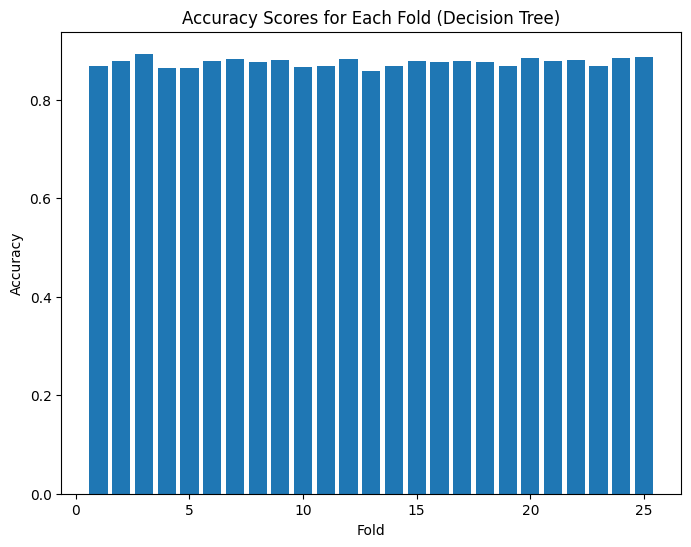

In [34]:
# Create a bar chart to show the accuracies across the different folds?

import matplotlib.pyplot as plt
# Create a bar chart to show the accuracies across the different folds
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_splits + 1), fold_accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Each Fold (Decision Tree)")
plt.show()


### k-fold Cross Validation for Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Number of folds for cross-validation
n_splits = 25

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
fold_accuracies = []

# Iterate through the folds
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set for the current fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)

### Plot of Model Accuracy for each Fold in the Logistic Regression Model

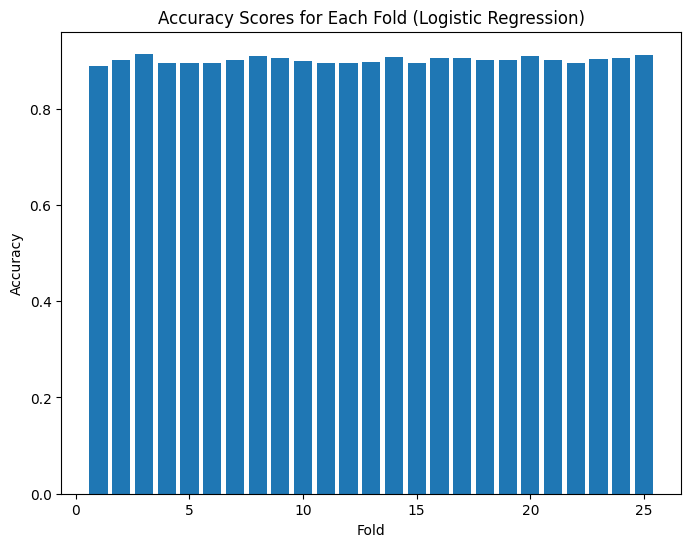

In [ ]:
# Create a bar chart to show the accuracies across the different folds
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_splits + 1), fold_accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Each Fold (Logistic Regression)")
plt.show()

### Problem 4: k-fold Cross Validation

- **Examine the code and determine the value of k in the k-fold Cross Validation procedure**
    - 25

- **Describe the purpose of k-fold Cross Validation**
    - K-fold Cross-Validation is a resampling procedure used to evaluate the performance of a model on unseen data. The main idea is to divide the dataset into K subsets. The model is trained on K-1 folds and tested on the remaining fold. This process repeats K times, with each fold being used once as a test set. The average performance across all folds gives a more robust estimate of model performance.

- **Explain why k-fold Cross Validation can provide more information than simply using a single train-test-split.**
    - Each data point gets a chance to be in both the training and test sets.
The model's performance is averaged across multiple splits, reducing the impact of any outliers or specific data distributions in a single test set.

- **In what scenarios would using k-fold Cross Validation be advantageous.**
    - When the dataset is small, and we want to maximize the use of available data for both training and testing.


### Creating a Learning Curve for the Tree and the Logistic Regression Models

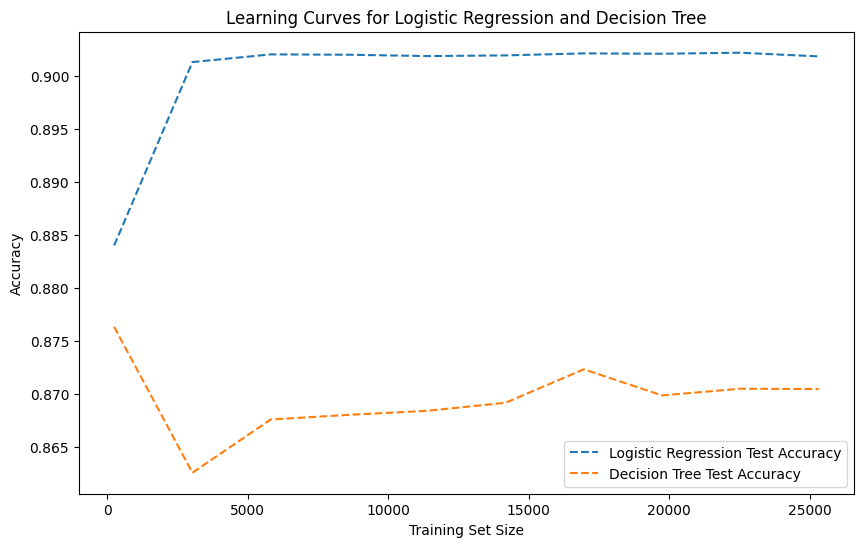

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# Generate learning curves for Logistic Regression
train_sizes_abs, train_scores_lg, test_scores_lg = learning_curve(
    LogisticRegression(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 10), scoring='accuracy'
)

# Generate learning curves for Decision Tree
train_sizes_abs, train_scores_dt, test_scores_dt = learning_curve(
    DecisionTreeClassifier(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation of training/test scores
test_mean_lg = np.mean(test_scores_lg, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot for Logistic Regression
plt.plot(train_sizes_abs, test_mean_lg, label="Logistic Regression Test Accuracy", linestyle='--')

# Plot for Decision Tree
plt.plot(train_sizes_abs, test_mean_dt, label="Decision Tree Test Accuracy", linestyle='--')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves for Logistic Regression and Decision Tree")
plt.legend()
plt.show()


### Problem 5: Comparing Model Performance by Training Set Size
**Compare the performance of the models developed through logistic regression and tree induction.**

- **Which model is superior overall and why?**
    - Logistic Regression is the superior model in this case based on the graph. It consistently achieves higher accuracy (over 90%) as the training set size increases.

- **Describe the performance of the Logistic Regression model as a function of training set size.**
    - Logistic Regression starts with a relatively high accuracy (around 88%) even with a small training set size.
As the training set size increases, the model quickly stabilizes and maintains a high accuracy of over 90%.


- **Describe the performance of the Decision Tree model as a function of training set size.**
    - The Decision Tree starts with slightly lower accuracy compared to Logistic Regression.
As the training set size increases, there are fluctuations in performance, with accuracy decreasing initially and then slightly increasing again, but it remains below 88% accuracy throughout.



### Problem 6: Overall Recommendations
**Which of the two models examinined in this analysis do you recommend the company use for their targeted marketing campaign. Please explain your reasoning.**

Based on the analysis of the learning curves and model performance, I recommend the company use the Logistic Regression model for their targeted marketing campaign.
The Logistic Regression model consistently demonstrates higher accuracy across all training set sizes.
The Decision Tree model shows signs of overfitting. Overfitting occurs when a model learns the training data too well but struggles to generalize on unseen data (such as future customers in this case). In contrast, Logistic Regression generalizes better across different data sets, meaning it can provide more reliable predictions when applied to new, unseen customers.
The Logistic Regression model consistently performs well across different training sizes, indicating that the model is less sensitive to changes in the amount of data.